In [204]:
import tensorflow as tf

In [205]:
from tensorflow.examples.tutorials.mnist import input_data

In [206]:
# Import Mnist data 

In [207]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [208]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [209]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [210]:
mnist.train.num_examples

55000

In [211]:
mnist.test.num_examples

10000

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
# Get the first data and plot it

In [214]:
single_image = mnist.train.images[1].reshape(28,28)

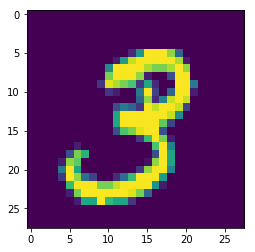

In [215]:
plt.imshow(single_image)

In [216]:
single_image.min()

0.0

In [217]:
single_image.max()

1.0

In [218]:
#PlaceHolders

In [219]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [220]:
#Variables

In [221]:
    #784 by 10 : pixels * num of output -0..9-
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [222]:
#Create Graph Ope

In [223]:
y = tf.matmul(x,w)+b

In [224]:
#Loss Function

In [225]:
y_true = tf.placeholder(tf.float32, shape=[None , 10])

In [226]:
cross_entropy = tf.reduce_mean (
    tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [227]:
#Optimizer

In [228]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train= optimizer.minimize(cross_entropy)

In [229]:
#Create Session

In [230]:
init = tf.global_variables_initializer()

In [231]:
import numpy as np

In [232]:
pred = np.array([0])

In [233]:
with tf.Session() as sess :
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    #Eval the Model
    correct_prediction = tf.equal (tf.argmax(y,1), tf.argmax(y_true,1))
    
    prediction=tf.argmax(y,1)
    best = sess.run([prediction],feed_dict={x:mnist.test.images, y_true:mnist.test.labels})
    
    predictionT=tf.argmax(y_true,1)
    bestT = sess.run([predictionT],feed_dict={x:mnist.test.images, y_true:mnist.test.labels})
    
    if(tf.equal (tf.argmax(y,1), tf.argmax(y_true,1)) == False):
        np.append(pred, y)
        
    #[true , false ] --> [1,0,]
    acc= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9179


In [234]:
h1 = np.array(best)
h2 = np.array(bestN)

In [235]:
b1 =h1.transpose()
b2 =h2.transpose()

In [236]:
s = b1.size
error = np.empty((0, 100))
for x in range(10000):
    if(b1[x]!=b2[x]):
        error = np.append(error,x)

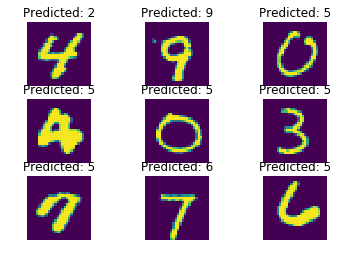

In [244]:
#Print the wrong prediction :
for i in range(0,9):
    plt.subplot(3,3,i+1)

    plt.axis('off')

    #plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")

    plt.title('Predicted: %i' % b1[int(round(error[i]))])
    single_image = mnist.train.images[int(round(error[i]))].reshape(28,28)
    plt.imshow(single_image)